## Linear Regression

***

Create a data set using the following code:

We will build 100 linear models using the data above and calculate the mean and standard deviation of the combined models. First, set the seed to 1 again (make sure to use sample.kind="Rounding" if your R is version 3.6 or later). Then, within a replicate() loop, (1) partition the dataset into test and training sets with p = 0.5 and using dat$y to generate your indices, (2) train a linear model predicting y from x, (3) generate predictions on the test set, and (4) calculate the RMSE of that model. Then, report the mean and standard deviation (SD) of the RMSEs from all 100 models.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import shap
# import statsmodels.api as sm
# import datetime
# from datetime import datetime, timedelta
# import scipy.stats
# import pandas_profiling
# from pandas_profiling import ProfileReport
# import graphviz

# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
# from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("data1.csv")

In [3]:
df

,x,y
0,68.30,66.44
1,69.41,69.54
2,68.20,65.46
3,72.91,73.38
4,70.84,68.87
...,...,...
95,72.02,68.88
96,63.52,67.85
97,69.03,65.99
98,65.20,66.44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
df.describe(include='all')

,x,y
count,100.00,100.00
mean,69.34,69.23
std,2.74,2.74
min,63.52,62.27
25%,67.39,67.29
50%,69.43,69.53
75%,70.99,71.04
max,75.76,75.88


In [6]:
df.shape

(100, 2)

In [7]:
df.columns

Index(['x', 'y'], dtype='object')

### Train Test Split

In [8]:
X = df.x
y = df.y

### Train Test Split Cont'd

In [9]:
X.values.reshape(-1,1), y.values.reshape(-1,1)

(array([[68.30297527],
        [69.41394554],
        [68.19535565],
        [72.90761794],
        [70.83796327],
        [64.2174297 ],
        [69.19131661],
        [69.55296251],
        [69.9196458 ],
        [65.68331358],
        [73.88132737],
        [70.70530953],
        [65.23754627],
        [64.22208544],
        [72.23372737],
        [69.47247095],
        [69.43792577],
        [71.87082836],
        [70.39231275],
        [70.80899662],
        [72.14650944],
        [69.01749148],
        [69.51559462],
        [64.10084748],
        [70.76064064],
        [67.7851738 ],
        [68.70557801],
        [65.23532448],
        [68.78022043],
        [70.57224943],
        [72.43971236],
        [69.61629138],
        [69.2099561 ],
        [71.13780153],
        [64.96245753],
        [70.22648723],
        [68.42706884],
        [69.63831913],
        [72.83609192],
        [71.06813392],
        [71.4440943 ],
        [66.57687208],
        [73.30822262],
        [71

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values.reshape(-1,1), test_size=0.5, random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 1), (50, 1), (50, 1), (50, 1))

### Using Regression or Classification Models

In [12]:
model1 = LinearRegression()

In [13]:
model1.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = model1.predict(X_test)

### Model Evaluation

In [15]:
mse = mean_squared_error(y_test,y_pred)
mse

5.467244526530624

In [16]:
rmse = np.sqrt(mse)
rmse

2.3382139608108203

In [17]:
r2score = r2_score(y_test,y_pred)
r2score

0.25345036617215255

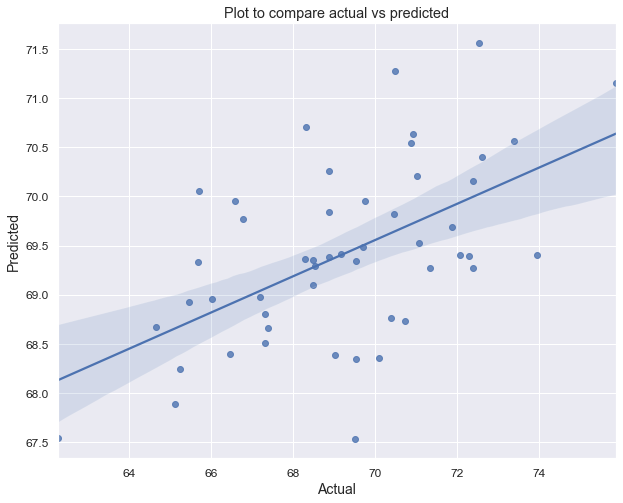

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

Now we will repeat the exercise above but using larger datasets. Write a function that takes a size n, then (1) builds a dataset using the code provided at the top of Q1 but with n observations instead of 100 and without the set.seed(1), (2) runs the replicate() loop that you wrote to answer Q1, which builds 100 linear models and returns a vector of RMSEs, and (3) calculates the mean and standard deviation of the 100 RMSEs.

Set the seed to 1 (if using R 3.6 or later, use the argument sample.kind="Rounding") and then use sapply() or map() to apply your new function to n <- c(100, 500, 1000, 5000, 10000).

Now repeat the exercise from Q1, this time making the correlation between x and y larger, as in the following code:

In [19]:
df = pd.read_csv("data2.csv")

In [20]:
df

,x,y
0,67.44,66.85
1,69.52,69.56
2,66.96,66.09
3,73.65,73.80
4,70.29,69.67
...,...,...
95,71.15,70.16
96,64.53,65.90
97,67.78,66.82
98,65.18,65.57


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [22]:
df.describe(include='all')

,x,y
count,100.00,100.00
mean,69.34,69.30
std,2.70,2.70
min,62.75,62.13
25%,67.49,67.41
50%,69.32,69.53
75%,70.87,71.11
max,75.91,76.32


In [23]:
df.shape

(100, 2)

In [24]:
df.columns

Index(['x', 'y'], dtype='object')

### Train Test Split

In [25]:
X = df.x
y = df.y

### Train Test Split Cont'd

In [26]:
X.values.reshape(-1,1), y.values.reshape(-1,1)

(array([[67.43854503],
        [69.52402245],
        [66.95673665],
        [73.65068111],
        [70.28658532],
        [65.73125919],
        [70.10392867],
        [70.75537815],
        [70.52338048],
        [67.29743321],
        [73.77984917],
        [70.37379538],
        [66.48033111],
        [62.74812963],
        [72.43071017],
        [69.05322001],
        [69.10382613],
        [71.92828582],
        [71.19825876],
        [70.84340693],
        [71.96224904],
        [70.6798339 ],
        [69.32266502],
        [63.19218892],
        [70.8836113 ],
        [68.49568462],
        [68.57338745],
        [64.6610966 ],
        [67.90693391],
        [70.39186757],
        [72.99622908],
        [68.97485294],
        [69.89627435],
        [69.56085289],
        [64.77537475],
        [68.49947925],
        [67.97477511],
        [69.0748833 ],
        [72.56787979],
        [71.28771553],
        [69.4206983 ],
        [67.69137369],
        [71.85435435],
        [70

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values.reshape(-1,1), test_size=0.5, random_state=0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 1), (50, 1), (50, 1), (50, 1))

### Using Regression or Classification Models

In [29]:
model2 = LinearRegression()

In [30]:
model2.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model2.predict(X_test)

### Model Evaluation

In [32]:
mse = mean_squared_error(y_test,y_pred)
mse

0.6581164565300793

In [33]:
rmse = np.sqrt(mse)
rmse

0.8112437713351514

In [34]:
r2score = r2_score(y_test,y_pred)
r2score

0.910283051335392

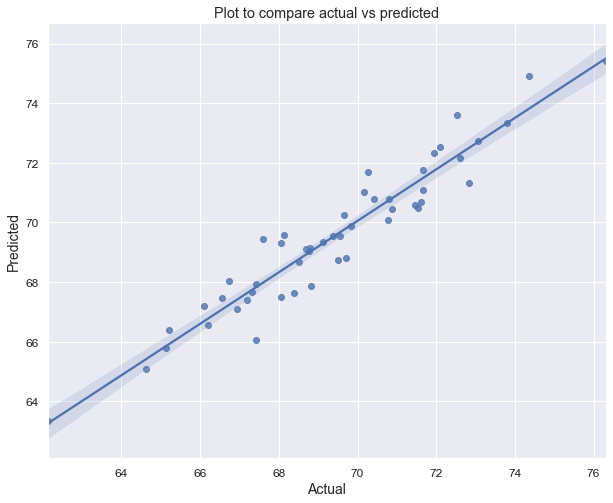

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

Create a data set using the following code.

Note that y is correlated with both x_1 and x_2 but the two predictors are independent of each other, as seen by cor(dat).

Set the seed to 1, then use the caret package to partition into test and training sets with p = 0.5. Compare the RMSE when using just x_1, just x_2 and both x_1 and x_2. Train a single linear model for each (not 100 like in the previous questions).

In [36]:
df = pd.read_csv("data3.csv")

In [37]:
df

,y,x_1,x_2
0,-0.54,-0.16,-0.92
1,0.48,-0.07,-0.02
2,-0.54,-0.27,-1.39
3,1.51,1.19,1.38
4,-0.08,0.92,0.11
...,...,...,...
95,0.57,1.06,-0.22
96,-1.12,-1.97,-0.20
97,-0.39,0.07,-1.18
98,-1.21,-1.20,-0.70


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    float64
 1   x_1     100 non-null    float64
 2   x_2     100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [39]:
df.describe(include='all')

,y,x_1,x_2
count,100.00,100.00,100.00
mean,0.11,0.11,0.06
std,0.91,0.92,0.92
min,-2.42,-2.00,-2.01
25%,-0.44,-0.53,-0.56
50%,0.16,0.12,0.12
75%,0.61,0.66,0.70
max,2.53,2.15,2.03


In [40]:
df.shape

(100, 3)

In [41]:
df.columns

Index(['y', 'x_1', 'x_2'], dtype='object')

### Train Test Split

In [42]:
X = df[["x_1","x_2"]]
y = df.y

### Train Test Split Cont'd

In [43]:
X.values, y.values

(array([[-0.15627188, -0.91606278],
        [-0.07151714, -0.01993594],
        [-0.27408299, -1.38972961],
        [ 1.18876647,  1.38231139],
        [ 0.91504731,  0.11334813],
        [-2.00447523,  0.16000079],
        [-0.13226855,  0.74551525],
        [-0.04029441,  1.07443681],
        [ 0.2168285 ,  0.68735754],
        [-1.32632522,  0.73391131],
        [ 1.59082213,  0.81220717],
        [ 0.54058943, -0.02480758],
        [-1.31835966,  0.43582066],
        [-1.18099628, -1.9779333 ],
        [ 0.89652737,  0.64253887],
        [ 0.03491152, -0.44617798],
        [ 0.21791614, -0.17399349],
        [ 1.05012172,  0.70827914],
        [ 0.26799681,  0.87325144],
        [ 0.57837748,  0.36119288],
        [ 1.22341451,  0.60374571],
        [-0.21060161,  1.4342783 ],
        [ 0.26045559, -0.00234944],
        [-1.40860783, -1.62851877],
        [ 0.6761444 ,  0.5534363 ],
        [-0.68259998,  0.19023442],
        [-0.03972928, -0.12982691],
        [-0.94783248, -0.993

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=0)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 2), (50, 2), (50,), (50,))

### Using Regression or Classification Models

In [46]:
model3 = LinearRegression()

In [47]:
model3.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = model3.predict(X_test)

### Model Evaluation

In [49]:
mse = mean_squared_error(y_test,y_pred)
mse

0.1379773508719314

In [50]:
rmse = np.sqrt(mse)
rmse

0.37145302646758904

In [51]:
r2score = r2_score(y_test,y_pred)
r2score

0.8399837701986

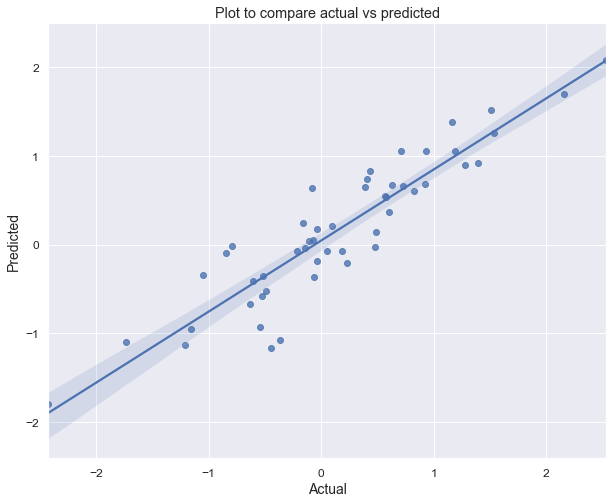

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

Repeat the exercise from Q6 but now create an example in which x_1 and x_2 are highly correlated.

In [53]:
df = pd.read_csv("data4.csv")

In [54]:
df

,y,x_1,x_2
0,0.26,0.67,0.80
1,-0.14,-0.45,0.08
2,0.31,0.75,1.25
3,-1.33,-1.52,-1.62
4,-0.60,0.18,-0.54
...,...,...,...
95,-0.99,-0.33,-0.29
96,1.80,0.80,1.04
97,0.03,0.62,0.92
98,1.27,1.10,1.08


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    float64
 1   x_1     100 non-null    float64
 2   x_2     100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [56]:
df.describe(include='all')

,y,x_1,x_2
count,100.00,100.00,100.00
mean,-0.11,-0.10,-0.09
std,0.91,0.91,0.90
min,-2.25,-2.56,-2.29
25%,-0.67,-0.67,-0.78
50%,-0.14,-0.21,-0.19
75%,0.57,0.54,0.55
max,1.80,2.49,2.06


In [57]:
df.shape

(100, 3)

In [58]:
df.columns

Index(['y', 'x_1', 'x_2'], dtype='object')

### Train Test Split

In [59]:
X = df[["x_1","x_2"]]
y = df.y

### Train Test Split Cont'd

In [60]:
X.values, y.values

(array([[ 0.67239945,  0.80186368],
        [-0.45307181,  0.08099682],
        [ 0.75033764,  1.25206096],
        [-1.51906614, -1.62370838],
        [ 0.18453789, -0.53811704],
        [ 0.01574458,  0.80557452],
        [-0.72934042, -0.51839557],
        [-0.9928562 , -0.82167347],
        [-0.63538975, -0.63962706],
        [-0.14808612,  0.01322433],
        [-1.29423338, -1.34621359],
        [-0.34294409, -0.20990876],
        [ 0.35398468,  0.22741554],
        [ 2.49092744,  2.05762966],
        [-1.19571384, -0.88333195],
        [-0.11251885,  0.36806673],
        [ 0.13323121,  0.03559887],
        [-0.65141019, -1.04773521],
        [-0.99924635, -0.79615182],
        [-0.52715191, -0.54129018],
        [-0.50278864, -1.05088043],
        [-1.04290844, -1.04223429],
        [ 0.07394321, -0.12537526],
        [ 2.00970259,  1.90187886],
        [-0.39292314, -0.75866343],
        [-0.38426312,  0.18594041],
        [ 0.21831934,  0.1136062 ],
        [ 1.67934068,  1.171

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=0)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 2), (50, 2), (50,), (50,))

### Using Regression or Classification Models

In [63]:
model4 = LinearRegression()

In [64]:
model4.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = model4.predict(X_test)

### Model Evaluation

In [66]:
mse = mean_squared_error(y_test,y_pred)
mse

0.30177704901269586

In [67]:
rmse = np.sqrt(mse)
rmse

0.5493423786789946

In [68]:
r2score = r2_score(y_test,y_pred)
r2score

0.594108347698685

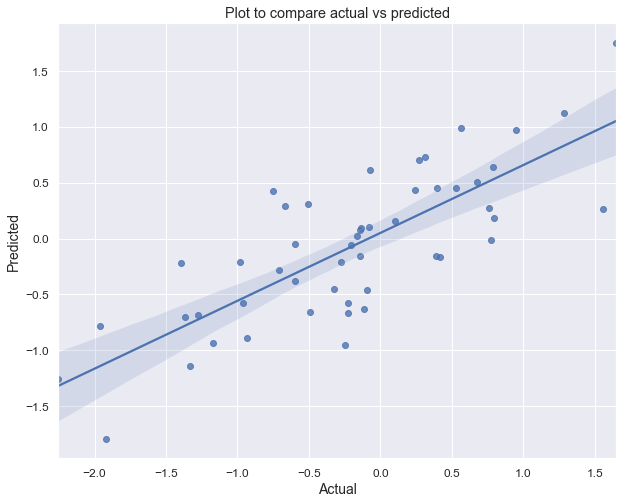

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

#### Python code done by Dennis Lam